
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 7
-----

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from matplotlib.lines import Line2D

from upsetplot import UpSet, from_contents

import os
import sys

# Suppress FutureWarning messages
import warnings
warnings.filterwarnings('ignore')

A_col = "#3288BD"
B_col = "#D53E4F"

-----
##### Set up input / output directories

In [11]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [12]:
sys.path.append(str(root_dir))
import helper_functions.ml_utils as mu
import helper_functions.plotter as plotter

-----
##### Load & prepare data 

In [13]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.tsv'), sep='\t', index_col=0)

low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

naive_samples = kzm611_md[kzm611_md.Therapy=='Pre-Therapy'].index.tolist()
treated_samples = kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()

naive_low_samples = [x for x in naive_samples if x in low_samples]
treated_low_samples = [x for x in treated_samples if x in low_samples]

In [14]:
## Load df for samples that passed both time & burden thresholds to show platinum signature
topr_quad = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_topRightQuad.tsv'), sep='\t', index_col=0)
topr_quad_samples = topr_quad.index.tolist()
print(f"Number of samples above time & burden thresholds: {len(topr_quad_samples)}")

## Divie samples into sig- & sig+ groups
sigN_samples = topr_quad[topr_quad.Platin_sig=='N'].index.tolist()
sigP_samples = topr_quad[topr_quad.Platin_sig=='Y'].index.tolist()

Number of samples above time & burden thresholds: 111


In [15]:
## Load mutation catalogs for various SBS mutation type configurations
fn96 = os.path.join(root_dir, 'source_data/KZM_mutation_catalogs/KZM.SBS96.all')
fn288 = os.path.join(root_dir, 'source_data/KZM_mutation_catalogs/KZM.SBS288.all')
fn1536 = os.path.join(root_dir, 'source_data/KZM_mutation_catalogs/KZM.SBS1536.all')

mat96_df, mat96_rel, mat96_nhm, mat96_nhm_rel = mu.get_context(fn96, low_samples)
mat288_df, mat288_rel, mat288_nhm, mat288_nhm_rel = mu.get_context(fn288, low_samples)
mat1536_df, mat1536_rel, mat1536_nhm, mat1536_nhm_rel = mu.get_context(fn1536, low_samples)

-----
## Panel a

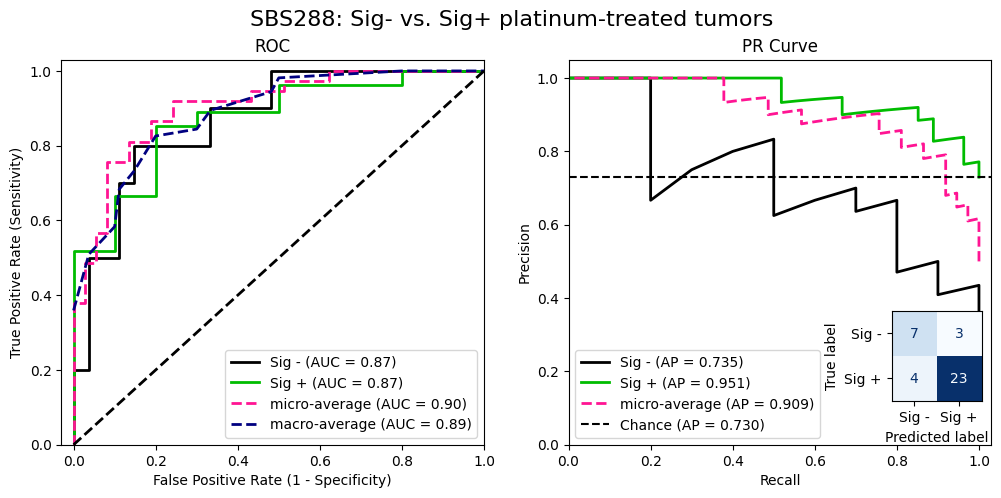

In [7]:
rf_mat288 = mu.get_votingClf_v1(mat288_rel, sigN_samples, sigP_samples, cv=True, extra_plots=True, plot_title='SBS288: Sig- vs. Sig+ platinum-treated tumors')
plt.savefig(os.path.join(fig_out, 'ExFig_7a.pdf'), bbox_inches="tight")

-----
## Panel b

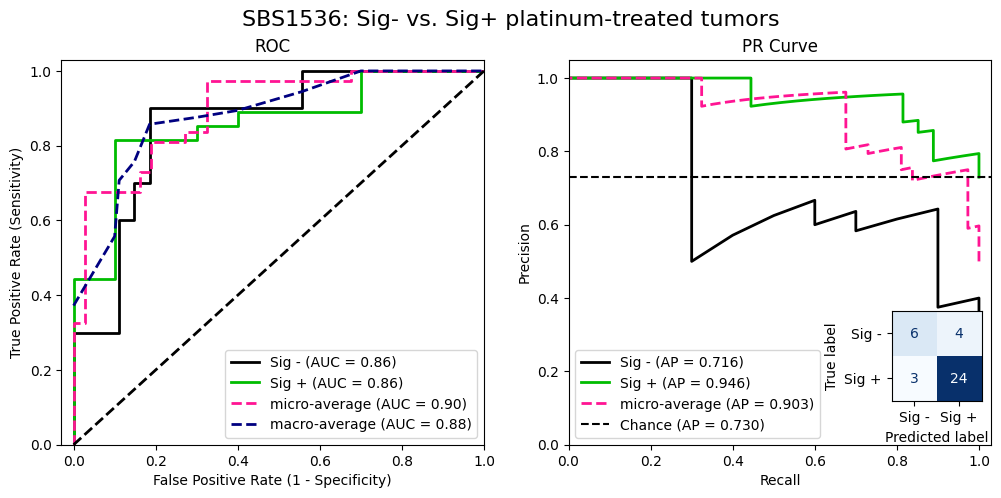

In [8]:
rf_mat1536 = mu.get_votingClf_v1(mat1536_rel, sigN_samples, sigP_samples, cv=True, extra_plots=True, plot_title='SBS1536: Sig- vs. Sig+ platinum-treated tumors')
plt.savefig(os.path.join(fig_out, 'ExFig_7b.pdf'), bbox_inches="tight")

-----
## Panel c

In [16]:
## Load COSMIC SBS signatures
cos_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/COSMIC_Sigs/COSMIC_v3.3.1_SBS_GRCh37.txt'), sep='\t', index_col=0).T
## Subset platinum signatures
cos_sigs.loc['SBS3135'] = cos_sigs.loc[['SBS31', 'SBS35']].mean()

In [7]:
SBS288_novelSigs = pd.read_csv(os.path.join(root_dir, 'source_data/SBS288_novelSigs.txt'), sep='\t', index_col=0)

SBS288_novelSigs['trinucs'] = [x[2:] for x in SBS288_novelSigs.index]
SBS96_novelSigs = SBS288_novelSigs.groupby(['trinucs']).sum()
SBS96_novelSigs.head(2)

,SBS288L1,SBS288L2,SBS288L3,SBS288L4,SBS288L5,SBS288H1,SBS288H2,SBS288H3,SBS288H4,SBS288H5
trinucs,,,,,,,,,,
A[C>A]A,0.021288,0.022425,0.003075,0.009064,0.006269,0.000008,0.000604,0.016663,0.004414,0.002145
A[C>A]C,0.000741,0.021694,0.001082,0.009632,0.035428,0.000262,0.000682,0.004052,0.001400,0.001638


In [8]:
plat_sigs = pd.concat([SBS96_novelSigs, cos_sigs], axis=1)
plat_sigs = plat_sigs[['SBS31', 'SBS35', 'SBS288L5']].T
plat_sigs

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,...,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
SBS31,0.009535,0.018490,0.001659,0.006277,0.008316,0.003158,0.002998,0.003778,0.017691,0.009275,...,0.003268,0.008875,0.004588,0.010295,0.004008,0.012094,0.002249,0.002379,0.005347,0.007296
SBS35,0.008827,0.046184,0.001390,0.021593,0.003579,0.004548,0.000346,0.009477,0.002209,0.003989,...,0.001380,0.005408,0.000368,0.000822,0.000438,0.001060,0.004289,0.001939,0.004818,0.003619
SBS288L5,0.006269,0.035428,0.000699,0.014305,0.004061,0.002184,0.000536,0.004809,0.007809,0.003252,...,0.004904,0.006271,0.005526,0.008112,0.002891,0.005834,0.001956,0.003093,0.006907,0.003230


In [9]:
mutations = plotter.get_mut_dict(plat_sigs)
ymax = plat_sigs.max().max() + 0.01

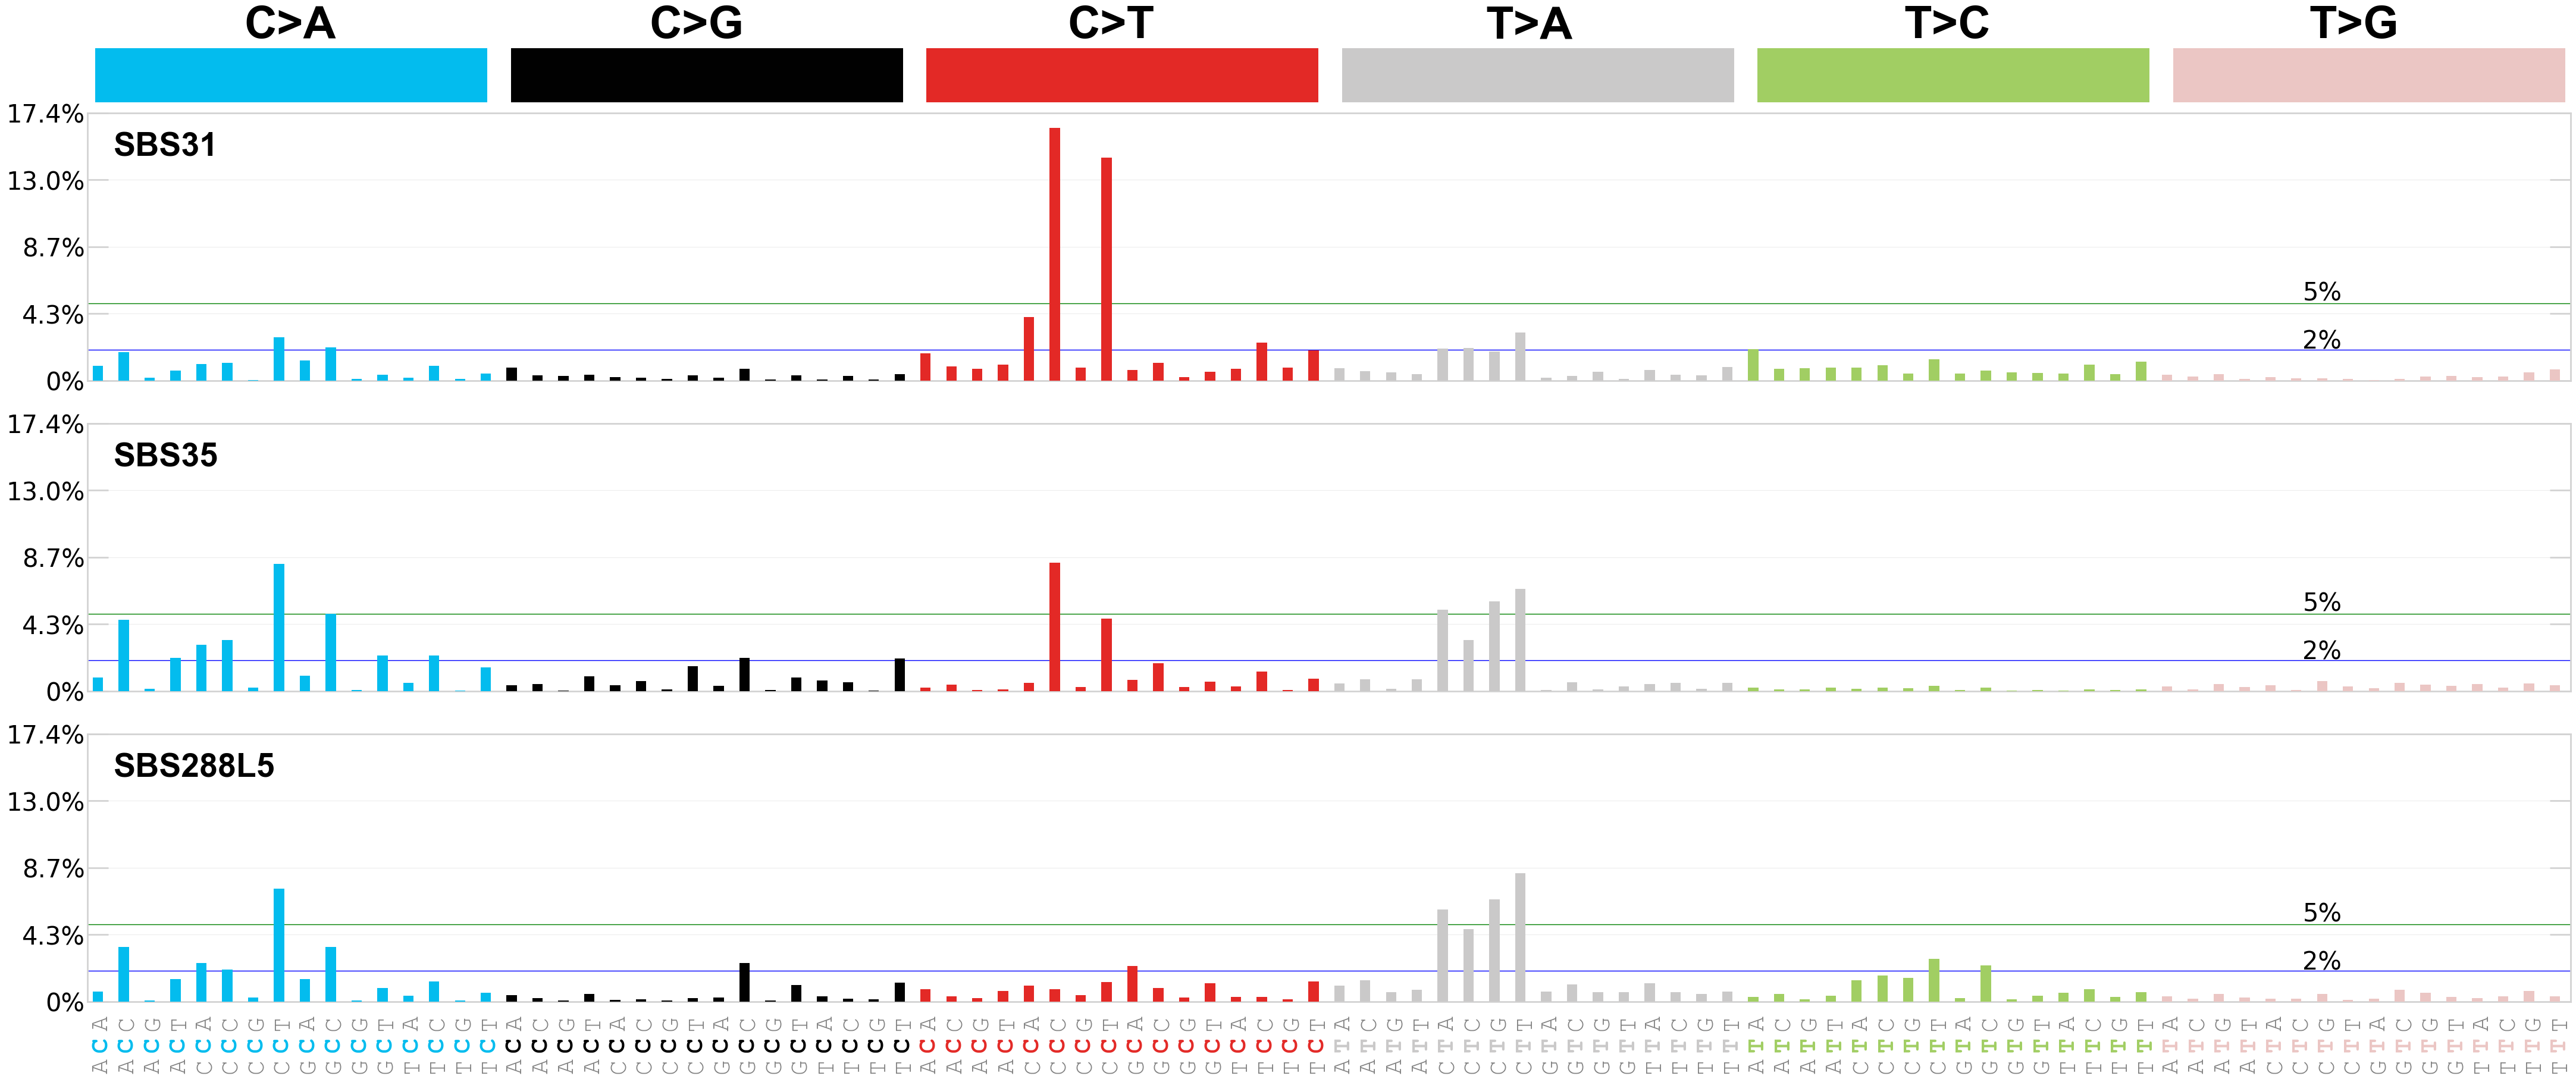

In [10]:
## mu.plot_3samples_SBS96
plotter.plot_3samples_SBS96(mutations['SBS31'], mutations['SBS35'], mutations['SBS288L5'],
                            'SBS31', 'SBS35', 'SBS288L5', ymax)
plt.savefig(os.path.join(fig_out, 'ExFig_7c.pdf'), bbox_inches="tight", dpi=300)

-----
## Panel d

In [11]:
plat_sigs.loc['total'] = plat_sigs.mean(axis=0)

In [12]:
sbs31_peaks_05 = plat_sigs.loc['SBS31'][plat_sigs.loc['SBS31'].ge(0.05)].index.tolist()
sbs35_peaks_05 = plat_sigs.loc['SBS35'][plat_sigs.loc['SBS35'].ge(0.05)].index.tolist()
sbs288L5_peaks_05 = plat_sigs.loc['SBS288L5'][plat_sigs.loc['SBS288L5'].ge(0.05)].index.tolist()
cosm_peaks_05 = list(set(sbs31_peaks_05 + sbs35_peaks_05))
plat_peaks_05 = list(set(cosm_peaks_05 + sbs288L5_peaks_05))

sbs31_peaks_02 = plat_sigs.loc['SBS31'][plat_sigs.loc['SBS31'].ge(0.02)].index.tolist()
sbs35_peaks_02 = plat_sigs.loc['SBS35'][plat_sigs.loc['SBS35'].ge(0.02)].index.tolist()
sbs288L5_peaks_02 = plat_sigs.loc['SBS288L5'][plat_sigs.loc['SBS288L5'].ge(0.02)].index.tolist()
cosm_peaks_02 = list(set(sbs31_peaks_02 + sbs35_peaks_02))
plat_peaks_02 = list(set(cosm_peaks_02 + sbs288L5_peaks_02))


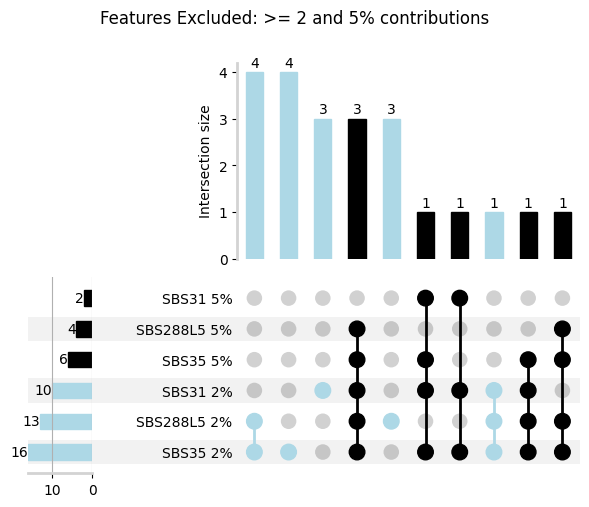

In [14]:
variantsP1 = from_contents({'SBS31 2%': sbs31_peaks_02,
                            'SBS35 2%': sbs35_peaks_02,
                            'SBS288L5 2%': sbs288L5_peaks_02,
                            'SBS31 5%': sbs31_peaks_05,
                            'SBS35 5%': sbs35_peaks_05,
                            'SBS288L5 5%': sbs288L5_peaks_05})

fig = plt.figure(figsize=(22, 10))

p1 = UpSet(variantsP1, subset_size='count', show_counts=True, sort_by='cardinality')
p1.style_subsets(present=['SBS31 2%'], absent=['SBS35 2%', 'SBS288L5 2%'], facecolor="lightblue")#, label='Unique to >2%')
p1.style_subsets(present=['SBS35 2%'], absent=['SBS31 2%', 'SBS288L5 2%'], facecolor="lightblue")
p1.style_subsets(present=['SBS288L5 2%'], absent=['SBS31 2%', 'SBS35 2%'], facecolor="lightblue")
p1.style_subsets(present=['SBS35 2%', 'SBS31 2%', 'SBS288L5 2%'], absent=['SBS35 5%'], facecolor="lightblue")
p1.style_subsets(present=['SBS288L5 2%', 'SBS35 2%'], absent=['SBS31 2%', 'SBS35 5%'], facecolor="lightblue") # , edgecolor="black", linewidth=1.5
p1.style_categories(['SBS35 2%', 'SBS31 2%', 'SBS288L5 2%'], bar_facecolor="lightblue")
#p1.style_categories(['SBS35 2%', 'SBS31 2%', 'SBS288L5 2%'], shading_edgecolor="lightblue", shading_linewidth=1)

params = {'legend.fontsize': 12, 'font.family':'sans-serif'}
with plt.rc_context(params):
    p1.plot(fig=fig)

plt.suptitle('Features Excluded: >= 2 and 5% contributions')
plt.grid(visible=False)
plt.savefig(os.path.join(fig_out, 'ExFig_7d.pdf'), bbox_inches="tight", dpi=300)

-----
## Panel e

In [ ]:
## Load mutation catalogs for various SBS mutation type configurations
fn96 = os.path.join(root_dir, 'source_data/POG_mutation_catalogs/POG.SBS96.all')
fn288 = os.path.join(root_dir, 'source_data/POG_mutation_catalogs/POG.SBS288.all')
fn1536 = os.path.join(root_dir, 'source_data/POG_mutation_catalogs/POG.SBS1536.all')

pog96_df, pog96_rel  = mu.get_context(fn96)
pog288_df, pog288_rel = mu.get_context(fn288)
pog1536_df, pog1536_rel = mu.get_context(fn1536)

In [ ]:
pog_drugs = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG570_all_drugs_YN.tsv'), sep='\t', index_col=0)
pog_drugs = pog_drugs[['CISPLATIN', 'CARBOPLATIN']]
pog_plat_samples = pog_drugs[(pog_drugs.CISPLATIN=='Y') | (pog_drugs.CARBOPLATIN=='Y')].index.tolist()
print(f"Platinum treated samples: {len(pog_plat_samples)}")

pog_sbs = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_SBS288_exposure.tsv'), sep='\t', index_col=0)
pog_sbs['Total'] = pog_sbs.sum(axis=1)
pog_sigs = pog_sbs[['SBS31', 'SBS35', 'Total']].copy()
pog_plat_sigs = pog_sigs[(pog_sigs.SBS31>99) | (pog_sigs.SBS35>99)].index.tolist()
print(f"Platinum Sig+ samples: {len(pog_plat_sigs)}")

pog_thr = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_therapy.tsv'), sep='\t')
pog_pats = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_patients.tsv'), sep='\t')

pog_treats = pd.read_csv(os.path.join(root_dir, 'source_data/POG_data/POG_treatments.tsv'), sep='\t')
pog_treats = pog_treats[pog_treats.Drug_name.isin(['CISPLATIN', 'CARBOPLATIN'])].reset_index(drop=True)
pog_treats['Biopsy_date'] = [pog_thr[pog_thr.Patient_ID==x]['Biopsy_date'].values[0] for x in pog_treats.Patient_ID]
pog_treats = pog_treats.sort_values(['Patient_ID', 'Therapy_start_date']).reset_index(drop=True)
pog_treats = pog_treats.drop_duplicates(subset=['Patient_ID'], keep='first')
pog_treats['Days_from'] = pog_treats.Biopsy_date - pog_treats.Therapy_start_date
pog_treats['Platin_sig'] = ['Y' if f'POG_{x}' in pog_plat_sigs else 'N' for x in pog_treats.Patient_ID]
pog_treats['Type'] = [pog_pats[pog_pats.PATIENT_ID==x]['HISTOLOGICAL_TYPE'].values[0] for x in pog_treats.Patient_ID]
pog_treats = pog_treats[~(pog_treats.Patient_ID.isin([25976]))] # This sample has 0 SBS
pog_treats['SBS'] = [pog_sigs.loc[f'POG_{x}', 'Total'] for x in pog_treats.Patient_ID]
pog_treats['Size'] = 1000
pog_treats['Days_log'] = np.log10(pog_treats.Days_from+0.00000000001)
pog_treats['SBS_log'] = np.log10(pog_treats.SBS+0.00000000001)

print(f"POG topQ samples: {pog_treats[(pog_treats.Days_from>90) & (pog_treats.SBS>1453)].Platin_sig.value_counts()}")

Platinum treated samples: 164
Platinum Sig+ samples: 46
POG topQ samples: Platin_sig
N    81
Y    41
Name: count, dtype: int64


In [ ]:
pog_sigPos = [f"POG_{x}" for x in pog_treats[(pog_treats.Days_from>90) & (pog_treats.SBS>1453) &(pog_treats.Platin_sig=='Y')].Patient_ID.tolist()]
pog_sigNeg = [f"POG_{x}" for x in pog_treats[(pog_treats.Days_from>90) & (pog_treats.SBS>1453) &(pog_treats.Platin_sig=='N')].Patient_ID.tolist()]
len(pog_sigNeg), len(pog_sigPos)

(81, 41)

In [ ]:
model_ind, features_kzm = mu.shap_swarm_single(mat96_rel, sigN_samples, sigP_samples)
features_df_kzm = mu.feats_2df(features_kzm, 'Sig-/+')

In [ ]:
model_ind, features_pog = mu.shap_swarm_single(pog96_rel, pog_sigNeg, pog_sigPos)
features_df_pog = mu.feats_2df(features_pog, 'Sig-/+')

In [ ]:
colors = {'C>A': [3 / 256, 189 / 256, 239 / 256],
          'C>G': [1 / 256, 1 / 256, 1 / 256],
          'C>T': [228 / 256, 41 / 256, 38 / 256],
          'T>A': [203 / 256, 202 / 256, 202 / 256],
          'T>C': [162 / 256, 207 / 256, 99 / 256],
          'T>G': [236 / 256, 199 / 256, 197 / 256],
}

Text(0.01, 0.95, 'Cosine Similarity: 77%')

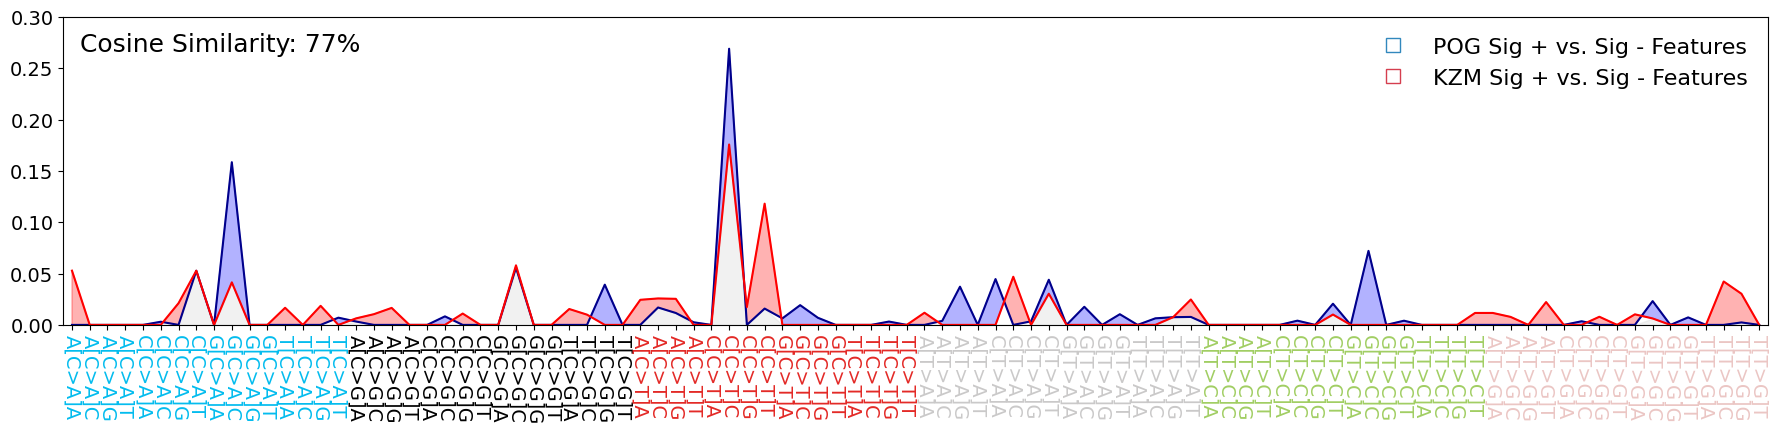

In [ ]:
fig, ax = plt.subplots(figsize=(22,4))

feats96_df1_pog_extra = pd.concat([features_df_pog, features_df_kzm], axis=1)
feats96_df1_pog_extra.columns = ['POG', 'KZM']

feats96_df1_pog_extra[['POG', 'KZM']].plot(color=['darkblue', 'red'], ax=ax)
ax.set_xticks(list(range(0, len(feats96_df1_pog_extra))), feats96_df1_pog_extra.index)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-90, ha="center", fontsize=8)
plt.fill_between(feats96_df1_pog_extra.index, feats96_df1_pog_extra[['POG', 'KZM']].min(axis=1), color='lightgray', alpha=0.3)
plt.fill_between(feats96_df1_pog_extra.index, feats96_df1_pog_extra['POG'], feats96_df1_pog_extra['KZM'],
                 where=(feats96_df1_pog_extra['POG'] > feats96_df1_pog_extra['KZM']), color='blue', alpha=0.3, interpolate=True)
plt.fill_between(feats96_df1_pog_extra.index, feats96_df1_pog_extra['POG'], feats96_df1_pog_extra['KZM'],
                 where=(feats96_df1_pog_extra['POG'] < feats96_df1_pog_extra['KZM']), color='red', alpha=0.3, interpolate=True)
ax.set_xlim(-0.5, 95.5)
ax.set_ylim(0, 0.3)
ax.tick_params(axis='both', which='major', labelsize=14)

custom_lines3 = [Line2D([], [], color=A_col, marker='s', markerfacecolor='none', markersize=10, linestyle='none', lw=4),
                 Line2D([], [], color=B_col, marker='s', markerfacecolor='none', markersize=10, linestyle='none', lw=4)]

ax.legend(custom_lines3, ['POG Sig + vs. Sig - Features', 'KZM Sig + vs. Sig - Features'], loc='upper right', fontsize=16, frameon=False)
labels = ax.get_xticklabels()
for label in labels:
    label.set_color(colors[label.get_text()[2:5]])

ax.text(0.01, 0.95, 'Cosine Similarity: 72%', transform=ax.transAxes, fontsize=18, va='top', ha='left')
plt.savefig(os.path.join(fig_out, 'ExFig_7e.pdf'), bbox_inches="tight")